<a href="https://colab.research.google.com/github/hongqin/python-covid19-analysis-sandbox/blob/master/PD_demo_jhu_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to analyze the Covid19 data
Hong Qin

Code at https://github.com/hongqin/python-covid19-analysis-sandbox/blob/master/PD_demo_jhu_covid19.ipynb

Video at https://youtu.be/1JDP4o92tss 

These materials are for education only.


In [3]:
### Import libraries
import pandas as pd # primary data structure library

# Part1. Downloading GitHub Data set 

In [1]:
! git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 138354, done.
remote: Counting objects: 100% (1335/1335), done.
remote: Compressing objects: 100% (747/747), done.
remote: Total 138354 (delta 704), reused 1200 (delta 585), pack-reused 137019
Receiving objects: 100% (138354/138354), 1.23 GiB | 26.40 MiB/s, done.
Resolving deltas: 100% (102374/102374), done.
Checking out files: 100% (1126/1126), done.


This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [4]:

### Select data path
fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df1 = pd.read_csv(fullpath1, error_bad_lines=False)

fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)

# Part 2. Explore USA time series by counties

In [5]:
df1.shape

(3342, 500)

view the dataframe

In [6]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6748,6750,6760,6763,6763,6773,6793,6819,6835,6876,6879,6882,6889,6890,6897,6904,6907,6909,6910,6910,6914,6914,6918,6918,6920,6920,6926,6928,6938,6971,7001,7005,7010,7015,7017,7049,7106,7113,7118,7118
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20674,20701,20714,20723,20730,20764,20787,20815,20833,20838,20847,20863,20875,20897,20921,20941,20966,20983,20993,20993,21035,21093,21107,21123,21131,21135,21154,21170,21191,21290,21392,21411,21422,21444,21467,21489,21511,21535,21546,21554
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2262,2264,2271,2271,2271,2275,2284,2289,2292,2296,2296,2296,2297,2298,2299,2300,2302,2302,2302,2302,2307,2307,2307,2307,2308,2308,2310,2314,2317,2319,2320,2320,2320,2322,2324,2326,2327,2328,2328,2328
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2560,2560,2563,2563,2567,2569,2569,2573,2578,2582,2584,2584,2588,2591,2593,2594,2596,2596,2597,2597,2604,2604,2604,2605,2607,2607,2609,2612,2615,2630,2645,2647,2648,2651,2652,2656,2657,2656,2658,2659
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6511,6519,6529,6532,6532,6548,6556,6563,6570,6570,6571,6574,6581,6595,6607,6613,6616,6619,6621,6621,6635,6645,6651,6656,6660,6661,6678,6680,6694,6750,6771,6773,6776,6794,6808,6816,6826,6829,6832,6832


How to find out the columns?

In [10]:
# dir(df1)

In [11]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '5/15/21', '5/16/21', '5/17/21', '5/18/21', '5/19/21', '5/20/21',
       '5/21/21', '5/22/21', '5/23/21', '5/24/21'],
      dtype='object', length=500)

In [12]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3689,3694,3694,3694,3703,3707,3711,3715,3719,3719,3719,3724,3725,3729,3730,3732,3732,3732,3739,3741,3744,3753,3751,3751,3751,3755,3758,3760,3762,3765,3765,3765,3769,3772,3770,3775,3776,3776,3776,3780
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2155,2155,2155,2155,2150,2155,2154,2157,2158,2158,2158,2165,2173,2180,2181,2183,2183,2183,2195,2204,2209,2211,2217,2217,2217,2229,2232,2234,2237,2239,2239,2239,2244,2249,2250,2251,2246,2246,2246,2252
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,898,898,898,898,898,898,898,898,898,898,898,898,901,903,903,903,903,903,906,906,911,911,911,911,911,912,913,914,918,918,918,918,917,917,920,921,921,921,921,921
3341,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,646,646,646,646,647,647,647,647,648,648,648,648,648,649,650,650,650,650,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,652,652,652,652


In [14]:
df1['Admin2'][3337:3339]

3337    Teton
3338    Uinta
Name: Admin2, dtype: object

In [16]:
df1.iloc[3337:3340, 4:7] #be aware that Python is typically end-exclusive! 

,FIPS,Admin2,Province_State
3337,56039.0,Teton,Wyoming
3338,56041.0,Uinta,Wyoming
3339,90056.0,Unassigned,Wyoming


How to find out dataframe dimensions

In [17]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3342, 500)


How many "province states" are there in this data set?

In [18]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [19]:
len(df1.Province_State.unique())

58

### Q, what is the larged case value in this data set? 

In [20]:
df1.iloc[:, 11:].max().max()

1238932

Find out the largest value for column '1/14/21'

In [22]:
df1["5/24/21"].max()

1238932

## Find out which row has the largest value. 

In [23]:
df1.loc[df1['5/24/21']==1238932]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
215,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,"Los Angeles, California, US",0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1227537,1228118,1228641,1228997,1229328,1229641,1229998,1230398,1230398,1231186,1231532,1231838,1232131,1232391,1232751,1233091,1233505,1233772,1233998,1234242,1234242,1234746,1235150,1235422,1235651,1235828,1235999,1236256,1236456,1237021,1237273,1237411,1237561,1237700,1237910,1238147,1238382,1238607,1238781,1238932


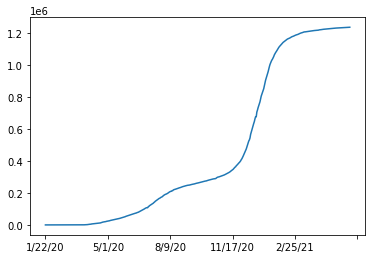

In [25]:
LA = df1.iloc[215, 11:]
type(LA)
#print(LA)
LA.plot()

## plot
Because pandas do plot by columns, JHU data set put time series by row. So, we have to transpose the JHU dataframe. 

In [26]:
UScases = df1.iloc[0:3, 11:].transpose() 
UScases.shape
UScases

,0,1,2
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
5/20/21,7049,21489,2326
5/21/21,7106,21511,2327
5/22/21,7113,21535,2328
5/23/21,7118,21546,2328


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5ba291cd0>,
      dtype=object)

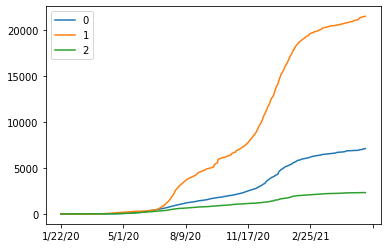

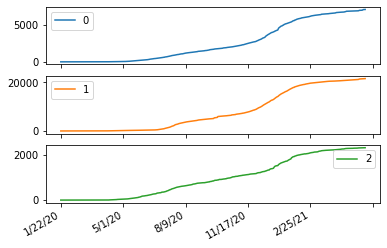

In [27]:
UScases.plot()
UScases.plot(subplots=True)

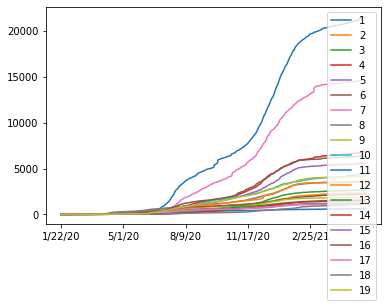

In [28]:
df1.iloc[1:20, 11:].transpose().plot()


## Add meaningful index to the dataframe

In [29]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"
df1.reset_index(drop=True)
df1.index

Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3342)

In [31]:
df1.shape

(3342, 499)

In [32]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
Combined_Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6748,6750,6760,6763,6763,6773,6793,6819,6835,6876,6879,6882,6889,6890,6897,6904,6907,6909,6910,6910,6914,6914,6918,6918,6920,6920,6926,6928,6938,6971,7001,7005,7010,7015,7017,7049,7106,7113,7118,7118
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20674,20701,20714,20723,20730,20764,20787,20815,20833,20838,20847,20863,20875,20897,20921,20941,20966,20983,20993,20993,21035,21093,21107,21123,21131,21135,21154,21170,21191,21290,21392,21411,21422,21444,21467,21489,21511,21535,21546,21554
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2262,2264,2271,2271,2271,2275,2284,2289,2292,2296,2296,2296,2297,2298,2299,2300,2302,2302,2302,2302,2307,2307,2307,2307,2308,2308,2310,2314,2317,2319,2320,2320,2320,2322,2324,2326,2327,2328,2328,2328
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2560,2560,2563,2563,2567,2569,2569,2573,2578,2582,2584,2584,2588,2591,2593,2594,2596,2596,2597,2597,2604,2604,2604,2605,2607,2607,2609,2612,2615,2630,2645,2647,2648,2651,2652,2656,2657,2656,2658,2659
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6511,6519,6529,6532,6532,6548,6556,6563,6570,6570,6571,6574,6581,6595,6607,6613,6616,6619,6621,6621,6635,6645,6651,6656,6660,6661,6678,6680,6694,6750,6771,6773,6776,6794,6808,6816,6826,6829,6832,6832


In [33]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.shape

(3342, 500)

In [34]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6748,6750,6760,6763,6763,6773,6793,6819,6835,6876,6879,6882,6889,6890,6897,6904,6907,6909,6910,6910,6914,6914,6918,6918,6920,6920,6926,6928,6938,6971,7001,7005,7010,7015,7017,7049,7106,7113,7118,7118
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20674,20701,20714,20723,20730,20764,20787,20815,20833,20838,20847,20863,20875,20897,20921,20941,20966,20983,20993,20993,21035,21093,21107,21123,21131,21135,21154,21170,21191,21290,21392,21411,21422,21444,21467,21489,21511,21535,21546,21554
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2262,2264,2271,2271,2271,2275,2284,2289,2292,2296,2296,2296,2297,2298,2299,2300,2302,2302,2302,2302,2307,2307,2307,2307,2308,2308,2310,2314,2317,2319,2320,2320,2320,2322,2324,2326,2327,2328,2328,2328
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2560,2560,2563,2563,2567,2569,2569,2573,2578,2582,2584,2584,2588,2591,2593,2594,2596,2596,2597,2597,2604,2604,2604,2605,2607,2607,2609,2612,2615,2630,2645,2647,2648,2651,2652,2656,2657,2656,2658,2659
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6511,6519,6529,6532,6532,6548,6556,6563,6570,6570,6571,6574,6581,6595,6607,6613,6616,6619,6621,6621,6635,6645,6651,6656,6660,6661,6678,6680,6694,6750,6771,6773,6776,6794,6808,6816,6826,6829,6832,6832


In [35]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

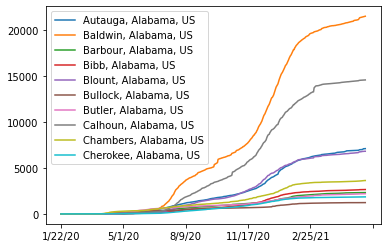

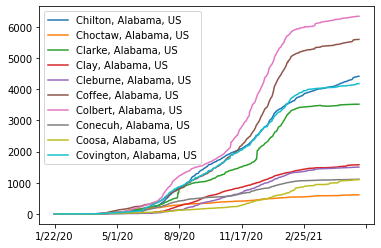

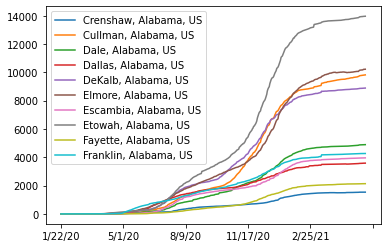

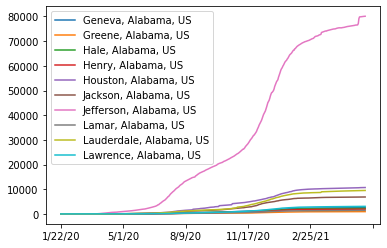

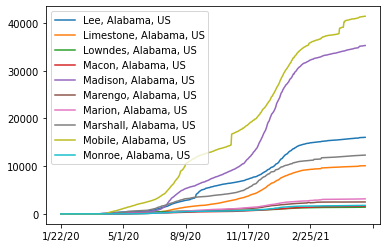

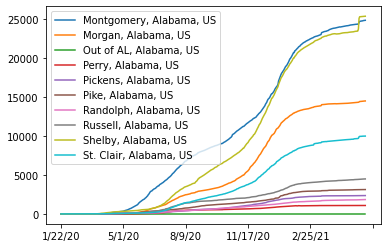

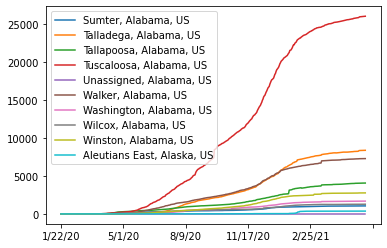

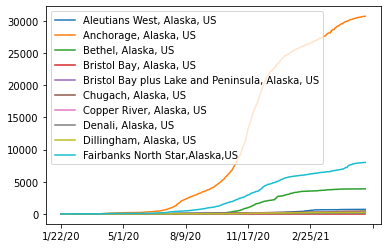

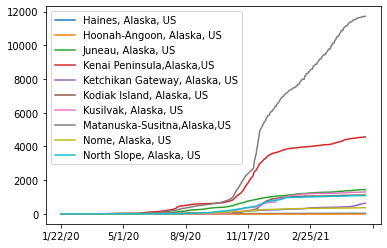

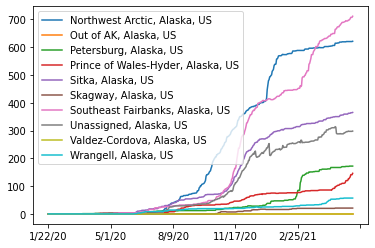

In [36]:
step = 10
for i in range(0, 100, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose()
  UScases.plot()

In [ ]:
df1.tail()

## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

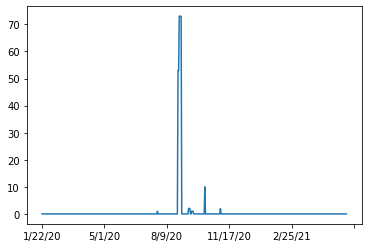

In [37]:
df1.loc['Unassigned, Wyoming, US', ][11:].plot()

In [38]:
df1.loc[ df1.index.str.contains('Unassigned'), ].shape
df1.loc[ df1.index.str.contains('Unassigned'), ].head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
"Unassigned, Alabama, US",84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,"Unassigned, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Unassigned, Alaska, US",84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,"Unassigned, Alaska, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,303,306,306,306,308,309,310,310,310,310,310,314,312,290,288,288,288,288,288,289,288,288,288,288,288,291,291,293,294,296,296,296,298,297,297,297,297,297,297,298
"Unassigned, Arizona, US",84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,"Unassigned, Arizona, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,2,2,2,2,0
"Unassigned, Arkansas, US",84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,"Unassigned, Arkansas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2815,2819,2824,2817,2810,2811,2810,2812,2816,2830,2826,2824,2822,2827,2825,2827,2827,2836,2833,2832,2837,2839,2843,2845,2838,2839,2854,2846,2840,2853,2851,2846,2846,2854,2852,2846,2845,2846,2853,2851
"Unassigned, California, US",84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,"Unassigned, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,50,61,33,61,51,44,47,68,92,61,60,84,34,53,38,47,50,44,37,35,44,45,32,33,39,39,35,37,52,48,45,46,36,26,29,39,58,29,39,42


In [ ]:
# df1.loc[df1.index.str.contains('Unassigned'), ].plot() #No, this is not working properly

In [ ]:
# df1.loc[df1.index.str.contains("Unsassigned"),11:].plot() #error 

In [ ]:
# df1.loc[df1.index.str.contains("Unassigned")][11:].plot() #wrong plot

In [ ]:
#df1.loc[df1.index.str.contains('Unassigned'), :][:,11:]

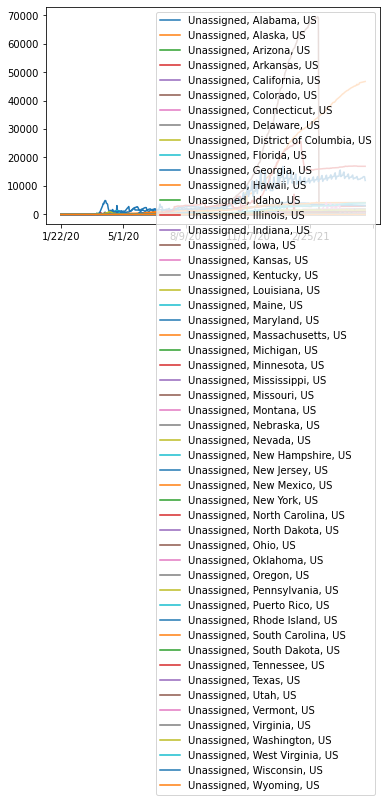

In [39]:
unassigned_df = df1.loc[df1.index.str.contains('Unassigned')]
unassigned_df.iloc[ :, 11:].shape
unassigned_df.iloc[ :, 11:].transpose().plot()

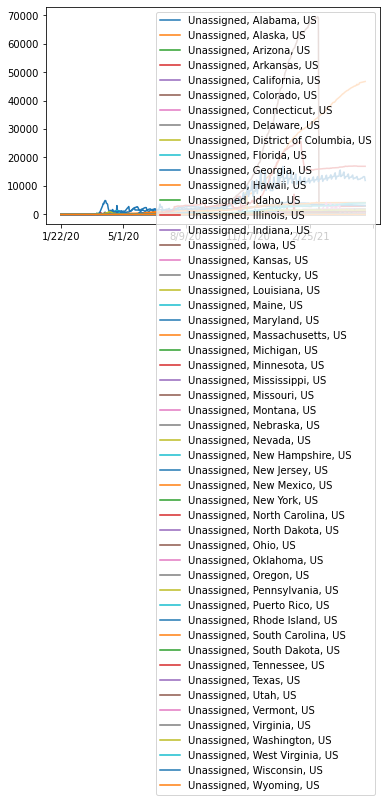

In [40]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[:, 11:].transpose().plot() # Well done, a single line solution! 

## How about the cases at the Hamilton county, TN? 

In [41]:
# Can we examine cumualted cases at the Hamilton County, TN? 


df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,43174,43254,43254,43254,43402,43438,43501,43575,43639,43639,43639,43732,43783,43826,43908,43960,43960,43960,44078,44114,44186,44219,44280,44280,44280,44378,44416,44482,44530,44570,44570,44570,44647,44677,44710,44740,44785,44785,44785,44843


In [42]:
dfHamilton = df1[df1.Combined_Key == "Hamilton, Tennessee, US"]
dfHamilton

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,43174,43254,43254,43254,43402,43438,43501,43575,43639,43639,43639,43732,43783,43826,43908,43960,43960,43960,44078,44114,44186,44219,44280,44280,44280,44378,44416,44482,44530,44570,44570,44570,44647,44677,44710,44740,44785,44785,44785,44843


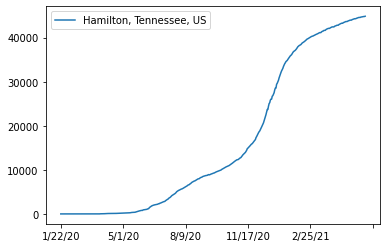

In [43]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

#Part 3. Examine the cases in each state.

In [44]:

df1.loc[ :, 'Province_State']

Autauga, Alabama, US       Alabama
Baldwin, Alabama, US       Alabama
Barbour, Alabama, US       Alabama
Bibb, Alabama, US          Alabama
Blount, Alabama, US        Alabama
                            ...   
Teton, Wyoming, US         Wyoming
Uinta, Wyoming, US         Wyoming
Unassigned, Wyoming, US    Wyoming
Washakie, Wyoming, US      Wyoming
Weston, Wyoming, US        Wyoming
Name: Province_State, Length: 3342, dtype: object

In [46]:
groupby_state = df1.iloc[:,11:].groupby(df1['Province_State'])
type( groupby_state )

pandas.core.groupby.generic.DataFrameGroupBy

In [47]:
df_by_state = groupby_state.sum()
type( df_by_state )

pandas.core.frame.DataFrame

In [48]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,521201,521623,522131,522401,522512,523955,524367,525049,525477,525898,526131,526348,526707,527083,527513,527922,528309,528597,528784,528784,529446,530011,530325,530744,530988,531094,531404,531751,532895,537813,539829,540083,540267,540603,540891,541230,541673,541928,542124,542256
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65730,65921,65921,65921,66370,66479,66680,66909,67059,67059,67059,67509,67647,67834,68002,68148,68148,68148,68426,68518,68666,68762,68880,68880,68880,69117,69178,69267,69351,69464,69464,69464,69600,69657,69756,69835,69902,69902,69902,69999
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,851725,852570,853050,853761,854453,855155,855804,856451,857347,858076,858737,859487,860169,860772,861653,862497,863571,863927,864579,865280,866022,866623,867443,868382,868830,869472,870155,870624,871168,872022,872496,872978,873446,874065,874605,875195,875766,876411,876732,877182
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,332949,333186,333407,333452,333511,333709,334061,334222,334458,334642,334706,334769,334998,335289,335529,335725,335968,336105,336166,336462,336760,336948,337170,337415,337510,337586,337819,338043,338235,338485,338687,338782,338849,339162,339406,339662,339863,340040,340137,340186


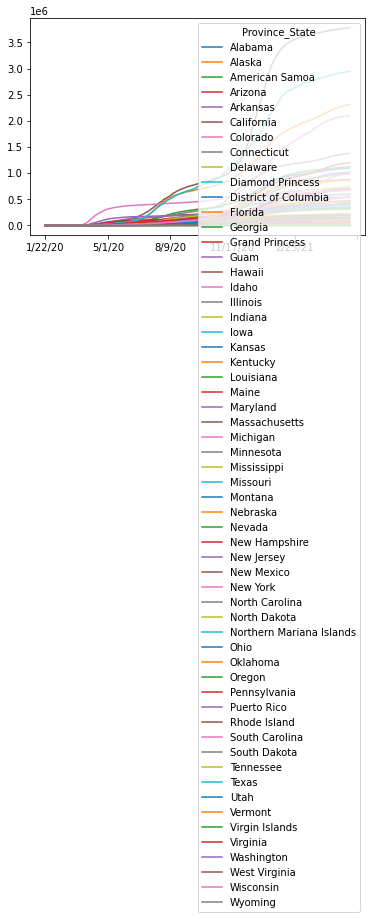

In [49]:
df_by_state.transpose().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5b9856990>,
      dtype=object)

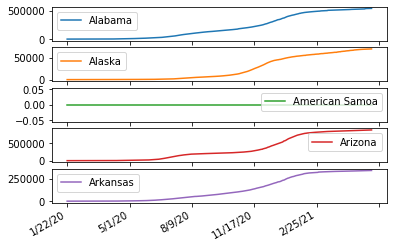

In [50]:
df_by_state.transpose().iloc[:,0:5].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5b9d34510>],
      dtype=object)

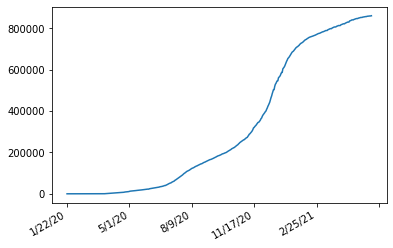

In [51]:
df_by_state.transpose().loc[:,"Tennessee"].plot(subplots=True)

In [52]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,521201,521623,522131,522401,522512,523955,524367,525049,525477,525898,526131,526348,526707,527083,527513,527922,528309,528597,528784,528784,529446,530011,530325,530744,530988,531094,531404,531751,532895,537813,539829,540083,540267,540603,540891,541230,541673,541928,542124,542256
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65730,65921,65921,65921,66370,66479,66680,66909,67059,67059,67059,67509,67647,67834,68002,68148,68148,68148,68426,68518,68666,68762,68880,68880,68880,69117,69178,69267,69351,69464,69464,69464,69600,69657,69756,69835,69902,69902,69902,69999
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,851725,852570,853050,853761,854453,855155,855804,856451,857347,858076,858737,859487,860169,860772,861653,862497,863571,863927,864579,865280,866022,866623,867443,868382,868830,869472,870155,870624,871168,872022,872496,872978,873446,874065,874605,875195,875766,876411,876732,877182
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,332949,333186,333407,333452,333511,333709,334061,334222,334458,334642,334706,334769,334998,335289,335529,335725,335968,336105,336166,336462,336760,336948,337170,337415,337510,337586,337819,338043,338235,338485,338687,338782,338849,339162,339406,339662,339863,340040,340137,340186


In [ ]:
# df_by_state.loc['Tennessee'][11:].transpose().plot() #This is bit problematic on the columns

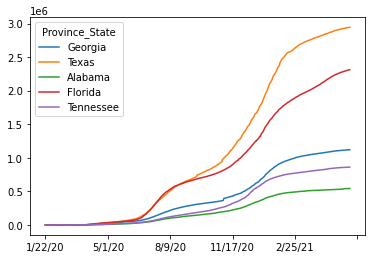

In [53]:
df_by_state.loc[['Georgia', 'Texas', 'Alabama', 'Florida', 'Tennessee']].transpose().plot() #Here, Texas and Tennessee are row-index

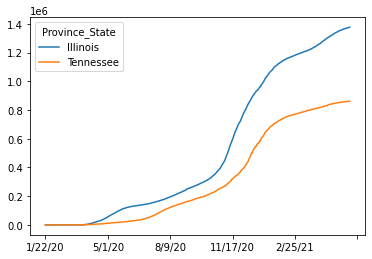

In [55]:
df_by_state.transpose()[['Illinois', 'Tennessee']].plot() #Here, Texas ans Tennessee are columns

# How to examine the new cases daily? 

## diff() on a test dataframe

In [56]:
dataset = [(2, 4, 6, 8),
           (10, 12, 14, 18),
           (20, 22, 24, 26),
           (28, 30, 32, 34)];

df_test = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));


In [57]:
df_test.diff(axis=0) #by row

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,8.0,8.0,8.0,10.0
2,10.0,10.0,10.0,8.0
3,8.0,8.0,8.0,8.0


In [58]:
df_test.diff(axis=1) #by column

,A,B,C,D
0,NaN,2.0,2.0,2.0
1,NaN,2.0,2.0,4.0
2,NaN,2.0,2.0,2.0
3,NaN,2.0,2.0,2.0


## diff() on US covid19 data set
 JHU cases are by row, and we need to calculate difference between columns

In [59]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,521201,521623,522131,522401,522512,523955,524367,525049,525477,525898,526131,526348,526707,527083,527513,527922,528309,528597,528784,528784,529446,530011,530325,530744,530988,531094,531404,531751,532895,537813,539829,540083,540267,540603,540891,541230,541673,541928,542124,542256
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65730,65921,65921,65921,66370,66479,66680,66909,67059,67059,67059,67509,67647,67834,68002,68148,68148,68148,68426,68518,68666,68762,68880,68880,68880,69117,69178,69267,69351,69464,69464,69464,69600,69657,69756,69835,69902,69902,69902,69999
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,851725,852570,853050,853761,854453,855155,855804,856451,857347,858076,858737,859487,860169,860772,861653,862497,863571,863927,864579,865280,866022,866623,867443,868382,868830,869472,870155,870624,871168,872022,872496,872978,873446,874065,874605,875195,875766,876411,876732,877182
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,332949,333186,333407,333452,333511,333709,334061,334222,334458,334642,334706,334769,334998,335289,335529,335725,335968,336105,336166,336462,336760,336948,337170,337415,337510,337586,337819,338043,338235,338485,338687,338782,338849,339162,339406,339662,339863,340040,340137,340186


In [60]:
df_dailycases_by_state =  df_by_state.diff(axis=1) #1 by columns
df_dailycases_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421.0,422.0,508.0,270.0,111.0,1443.0,412.0,682.0,428.0,421.0,233.0,217.0,359.0,376.0,430.0,409.0,387.0,288.0,187.0,0.0,662.0,565.0,314.0,419.0,244.0,106.0,310.0,347.0,1144.0,4918.0,2016.0,254.0,184.0,336.0,288.0,339.0,443.0,255.0,196.0,132.0
Alaska,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,194.0,191.0,0.0,0.0,449.0,109.0,201.0,229.0,150.0,0.0,0.0,450.0,138.0,187.0,168.0,146.0,0.0,0.0,278.0,92.0,148.0,96.0,118.0,0.0,0.0,237.0,61.0,89.0,84.0,113.0,0.0,0.0,136.0,57.0,99.0,79.0,67.0,0.0,0.0,97.0
American Samoa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,460.0,845.0,480.0,711.0,692.0,702.0,649.0,647.0,896.0,729.0,661.0,750.0,682.0,603.0,881.0,844.0,1074.0,356.0,652.0,701.0,742.0,601.0,820.0,939.0,448.0,642.0,683.0,469.0,544.0,854.0,474.0,482.0,468.0,619.0,540.0,590.0,571.0,645.0,321.0,450.0
Arkansas,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,283.0,237.0,221.0,45.0,59.0,198.0,352.0,161.0,236.0,184.0,64.0,63.0,229.0,291.0,240.0,196.0,243.0,137.0,61.0,296.0,298.0,188.0,222.0,245.0,95.0,76.0,233.0,224.0,192.0,250.0,202.0,95.0,67.0,313.0,244.0,256.0,201.0,177.0,97.0,49.0


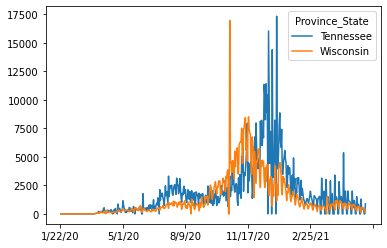

In [61]:
df_dailycases_by_state.transpose()[['Tennessee', 'Wisconsin']].plot()

In [62]:
df_dailycases_by_state.loc[['Tennessee', 'Texas']].iloc[:, 2:].rolling(window=3).mean()

#.rolling(window=3).mean()

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3, center=False).mean()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,NaN,NaN
1/24/20,NaN,NaN
1/25/20,0.000000,0.000000
1/26/20,0.000000,0.000000
...,...,...
5/20/21,448.666667,78.333333
5/21/21,426.666667,81.666667
5/22/21,267.666667,48.666667
5/23/21,127.666667,22.333333


In [64]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].head()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


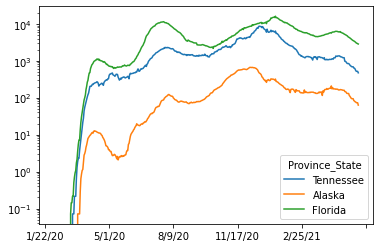

In [65]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska', 'Florida']].rolling(window=14).mean().plot(logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5b790c890>,
      dtype=object)

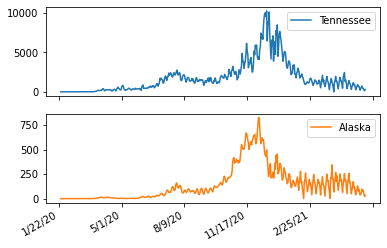

In [66]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3).mean().plot(subplots=True)

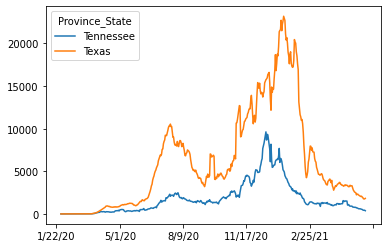

In [67]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].rolling(window=7).mean().plot()

In [68]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].head()

Province_State,Tennessee,Texas
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


## Examine the daily confirmed cases in Hamilton County, TN

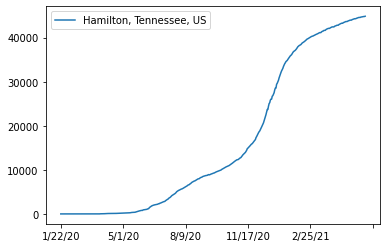

In [69]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

In [70]:
df_Hamilton = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:]

type(df_Hamilton)
df_Hamilton.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,43174,43254,43254,43254,43402,43438,43501,43575,43639,43639,43639,43732,43783,43826,43908,43960,43960,43960,44078,44114,44186,44219,44280,44280,44280,44378,44416,44482,44530,44570,44570,44570,44647,44677,44710,44740,44785,44785,44785,44843


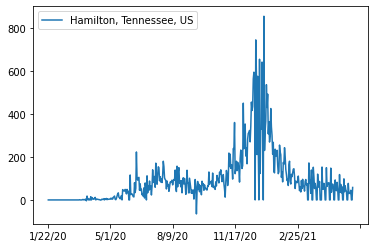

In [71]:
df_Hamilton.transpose().diff(axis=0).plot()

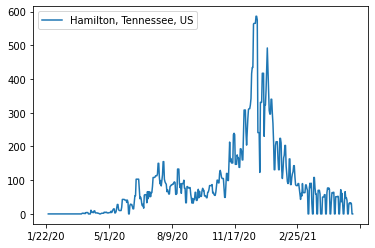

In [72]:
df_Hamilton.transpose().diff(axis=0).rolling(window=3).median().plot()

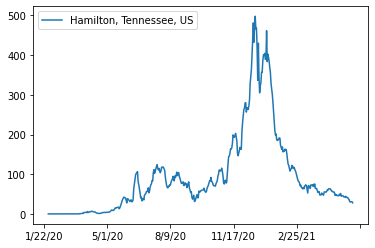

In [73]:
df_Hamilton.transpose().diff(axis=0).rolling(window=7).mean().plot()

# Pick a time window using datetime

In [74]:
#from datetime import datetime 

df_dailycases_by_state2 = df_dailycases_by_state.transpose()

df_dailycases_by_state2.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
df_dailycases_by_state2.index = pd.to_datetime(df_dailycases_by_state2.index)
df_dailycases_by_state2.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24'],
              dtype='datetime64[ns]', length=489, freq=None)

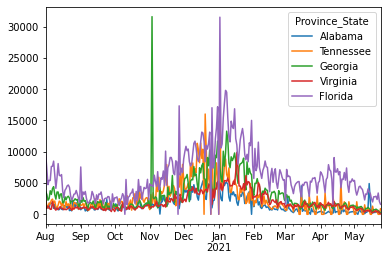

In [76]:
df_dailycases_by_state2.loc['2020-08-01':, ['Alabama', 'Tennessee', 'Georgia', 'Virginia', 'Florida']].plot()


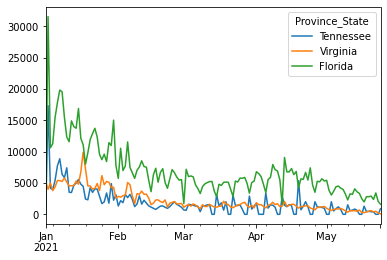

In [83]:

df_dailycases_by_state2.loc['2021-01-01':'2021-05-24', ['Tennessee',  'Virginia', 'Florida']].plot()

## Examine the row with the largest value on 9/8/2020

In [77]:
subset = df1.loc[df1['9/8/20']==249241]

In [78]:
subset = subset.transpose()
subset = subset.iloc[:][11:]
type(subset)

pandas.core.frame.DataFrame

In [79]:
type(subset)

pandas.core.frame.DataFrame

In [80]:
from datetime import datetime

#datetime.strptime( '9/8/20', '%m/%d/%y') 

dates = [datetime.strptime( x, '%m/%d/%y') for x in subset.columns[11:]]
print(dates)

[]


In [81]:
df1.iloc[5:10, -20:-1 ]

,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
"Bullock, Alabama, US",1229,1230,1230,1230,1230,1230,1228,1228,1228,1230,1232,1232,1233,1233,1233,1233,1233,1233,1233
"Butler, Alabama, US",2158,2158,2159,2159,2159,2159,2160,2164,2164,2178,2190,2191,2190,2190,2191,2195,2199,2201,2202
"Calhoun, Alabama, US",14469,14481,14488,14496,14501,14505,14511,14515,14522,14556,14569,14574,14577,14580,14586,14590,14588,14595,14606
"Chambers, Alabama, US",3555,3559,3559,3560,3563,3563,3573,3575,3578,3581,3590,3596,3598,3606,3616,3622,3634,3636,3640
"Cherokee, Alabama, US",1841,1843,1844,1846,1848,1849,1852,1852,1847,1843,1846,1848,1848,1849,1850,1852,1852,1854,1858


#Part 4 Explore Global Data set

In [ ]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns

In [ ]:
df2['Country/Region']
list(df2['Country/Region'].unique())

In [ ]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)

In [ ]:
df2by_country = df2.iloc[:, 5:].groupby(df2['Country/Region']).sum().transpose()

In [ ]:
df2by_country.head()

In [ ]:
df2by_country.index = pd.to_datetime(df2by_country.index)

In [ ]:
### Check if the dataframe contains NaN values
df2by_country.head()

In [ ]:
  df2by_country.columns[ df2by_country.columns.str.contains('US') ]

In [ ]:
  df2by_country[['US', 'France', 'India', 'Sweden']].plot(logy=True)


In [ ]:
  df2by_country[['US', 'France', 'India', 'Sweden']]['2020-05-01':].plot(logy=False)

# Alternative approach to load data from GitHub

Go to GitHub, select the csv file,  select "view as raw",  and copy the URL. 

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

df = pd.read_csv(url)

In [ ]:
df.head

In [ ]:
? pd.read_csv()

In [ ]:
df2 = pd.read_csv(url, skiprows=5)
df2.head

#Part 5. In progress Load Google Mobility data set

In [84]:
#? not working, this site is down. 
#urlGoogleMobility = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
#df.GM = pd.read_csv(urlGoogleMobility )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NameError: ignored

In [ ]:
df.GM.head